God info
https://www.kaggle.com/code/surajiiitm/k-means-clustering-in-python-from-scratch


Prøv å skjør på hele datasettet


In [188]:
import pandas as pd

from numpy import where
# from sklearn.datasets import make_classification
from matplotlib import pyplot

In [189]:
data = pd.read_csv("GroupExam2024_data_and_documentation/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=';', decimal=',')



In [190]:
# #Sile ut informasjon:

# df['Bruttotonnasje Kombinert'] = df['Bruttotonnasje 1969'].fillna(df['Bruttotonnasje annen'])

# # Dropper unødvendig informasjon. Tabellen inneholder masse duplikater. som egen kolonne for navn og for kode
# # Forskjellige klassifiseringsmåter. Holder på FDIR sine.

# df.drop(columns = ['Meldingsdato', 
#                    'Meldingsklokkeslett', 
#                    'Startdato', 
#                    'Startklokkeslett', 
#                    'Hovedområde start', 
#                    'Lokasjon start (kode)', 
#                    'Stoppdato', 
#                    'Stoppklokkeslett', 
#                    'Fangstår', 
#                    'Hovedområde stopp (kode)', 
#                    'Hovedområde stopp', 
#                    'Lokasjon stopp (kode)', 
#                    'Redskap FAO (kode)', 
#                    'Redskap FAO', 
#                    'Redskap FDIR', 
#                    'Hovedart FAO (kode)', 
#                    'Hovedart FAO', 
#                    'Art FAO (kode)',
#                    'Art FAO',
#                    'Art - gruppe', 
#                    'Lengdegruppe', 
#                    'Bredde', 
#                    'Fartøylengde',
#                    'Bruttotonnasje 1969',
#                    'Bruttotonnasje annen'
#     ], inplace=True)

In [191]:
data.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,-60.350,-46.133,NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,19.87,133.88
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,74.885,16.048,20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,12.60,56.80
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,74.885,16.048,20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,12.60,56.80
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,74.885,16.048,20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,12.60,56.80
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,74.885,16.048,20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,12.60,56.80


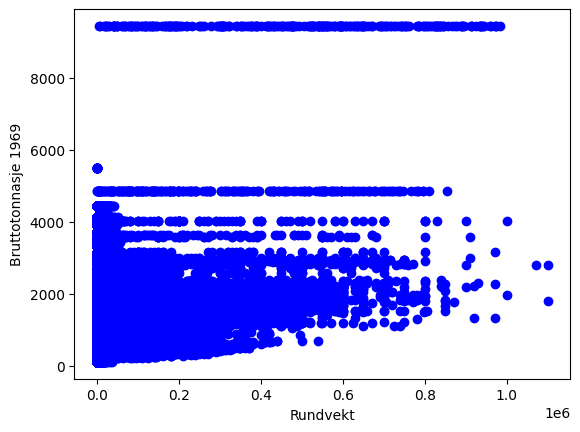

In [192]:
datapoint_one = "Rundvekt"
datapoint_two = "Bruttotonnasje 1969"

X = data[[datapoint_one, datapoint_two]]
# Visualize data point
pyplot.scatter(X[datapoint_one], X[datapoint_two], c="blue")
pyplot.xlabel(datapoint_one)
pyplot.ylabel(datapoint_two)
pyplot.show()



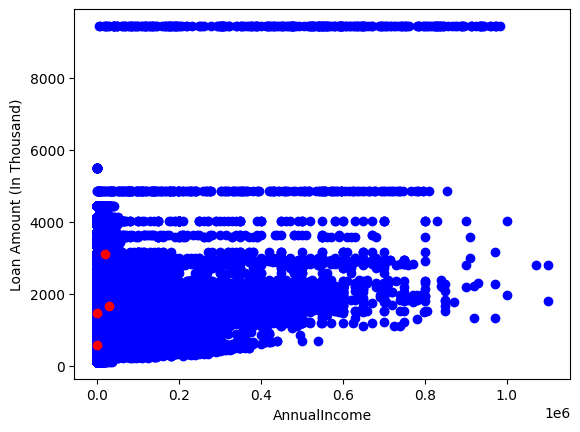

In [193]:
K=5

Centroids = (X.sample(n=K))
pyplot.scatter(X[datapoint_one], X[datapoint_two], c="blue")
pyplot.scatter(Centroids[datapoint_one], Centroids[datapoint_two], c="red")
pyplot.xlabel("AnnualIncome")
pyplot.ylabel("Loan Amount (In Thousand)")
pyplot.show()

In [194]:
from math import sqrt

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c[datapoint_one]-row_d[datapoint_one])**2
            d2 = (row_c[datapoint_two]-row_d[datapoint_two])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[[datapoint_two, datapoint_one]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new[datapoint_two] - Centroids[datapoint_two]).sum() + (Centroids_new[datapoint_one] - Centroids[datapoint_one]).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[[datapoint_two,datapoint_one]]

C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

114684.12704757524


C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


78794.50085027987


C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


41001.56636304904


C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


18697.066780512727


C:\Users\sandv\AppData\Local\Temp\ipykernel_24188\67086232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


KeyboardInterrupt: 

: 

In [ ]:
Just ignore below output. no clue why it pops up like that. i assume its due to the function of make_classifications

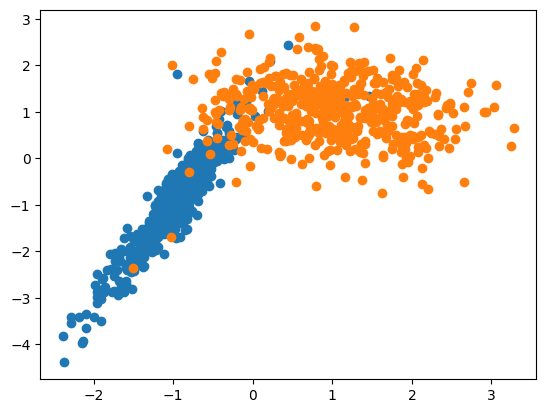

In [ ]:


X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=6)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

NameError: name 'unique' is not defined